In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings

In [ ]:
df = pd.read_csv("C:\\Users\\vaccine\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'Diabetes')

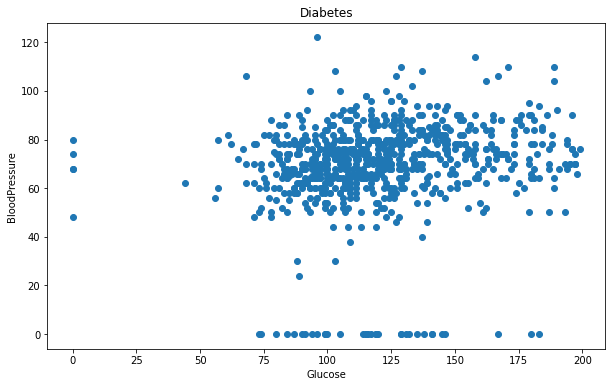

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['Glucose'],df['BloodPressure'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Diabetes')

In [ ]:
X = df.iloc[:, [1,2]].values
X

array([[148,  72],
       [ 85,  66],
       [183,  64],
       ...,
       [121,  72],
       [126,  60],
       [ 93,  70]], dtype=int64)

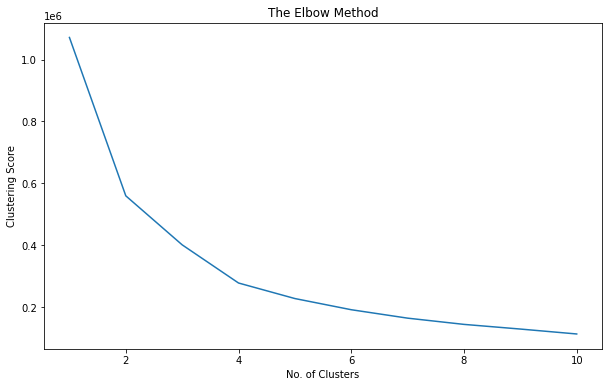

In [ ]:
from sklearn.cluster import KMeans
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    #kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
#plt.scatter(5,clustering_score[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 4, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([0, 1, 2, 1, 0, 0, 1, 3, 2, 0, 0, 2, 0, 2, 2, 3, 0, 1, 3, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 1, 1, 3, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 3, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 3, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1,
       2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 3, 1, 1, 2,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 0,
       2, 2, 3, 0, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 2, 3, 1, 0,
       0, 1, 3, 0, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 3,

In [ ]:
df['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', df['Cluster'].value_counts())
df

Number of data points in each cluster= 
 1    297
0    293
2    141
3     37
Name: Cluster, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,0


Text(0.5, 1.0, 'Clusters representation')

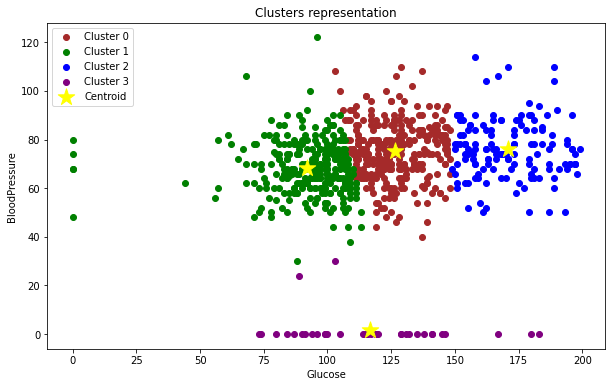

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown' , label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'yellow', label = 'Centroid', marker='*')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

plt.legend()
plt.title('Clusters representation')

In [ ]:
import numpy as np

def clustering(X, k, maximum_iter=100):

    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(maximum_iter):
        #  distances between each data point and the centroids
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
        w = 1/distances
        #print(distances)
        
        # s=np.sum(w, axis=0)
        # Normalize
        w = w/np.sum(w, axis=0)
        
        #print(w)
        #  data points --> cluster with the highest weight
        clusters = np.argmax(w, axis=0)

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        #new_centroids = np.array([np.average(X[clusters == j], axis=0, weights=w[clusters == j]) for j in range(k)])
        # Check 
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids


c:\users\anves\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
c:\users\anves\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


[1 2 0 2 1 1 2 3 0 1 1 0 1 0 0 3 1 2 3 1 1 2 0 1 1 1 1 2 1 1 1 0 2 2 1 2 1
 2 2 1 0 1 1 0 0 0 1 2 2 3 2 2 2 0 0 2 0 2 1 2 3 1 2 1 1 2 1 1 2 1 2 1 1 1
 2 2 2 2 3 1 2 3 2 2 1 1 2 2 1 2 2 1 2 1 1 1 2 2 2 1 0 0 1 2 2 1 2 1 2 2 0
 0 2 2 0 1 1 2 2 2 0 1 2 1 1 2 1 1 1 2 0 1 0 2 2 1 2 2 1 2 1 2 2 2 0 2 2 2
 1 2 1 1 0 0 0 0 2 2 2 0 0 2 1 2 1 2 1 1 2 1 2 1 3 2 2 0 2 1 1 1 2 1 2 2 1
 0 0 1 1 1 2 1 0 3 2 0 2 2 2 1 1 1 2 2 2 1 0 0 2 0 2 1 0 1 1 0 2 1 2 1 0 0
 3 1 2 2 2 0 0 1 1 1 2 1 2 0 0 0 0 2 2 2 1 1 1 0 1 0 1 1 2 1 2 2 2 1 2 1 0
 0 0 3 2 1 1 2 3 1 2 3 2 2 1 2 2 2 2 2 1 2 1 1 1 0 1 1 0 1 2 2 2 2 1 1 0 0
 1 1 2 1 3 1 2 1 0 1 0 1 1 1 2 2 0 2 1 1 2 0 1 0 1 1 1 0 1 0 1 0 2 2 1 2 3
 2 2 0 3 1 0 0 1 2 2 1 2 1 1 3 2 2 2 1 2 2 2 0 1 3 2 0 0 0 1 1 1 2 1 2 2 1
 0 1 2 2 1 1 2 2 0 2 2 2 2 2 1 1 1 1 1 2 2 0 1 1 0 1 2 1 2 0 2 1 1 2 0 1 1
 2 0 0 2 1 1 1 1 0 2 1 2 1 1 2 2 1 0 0 3 0 1 2 3 2 2 1 2 3 1 1 2 1 0 2 1 2
 1 0 2 2 2 1 2 1 2 3 2 0 1 2 1 1 1 2 2 2 1 1 2 2 3 0 1 1 1 1 1 1 2 1 1 1 0
 1 2 2 3 1 1 0 2 0 2 2 2 

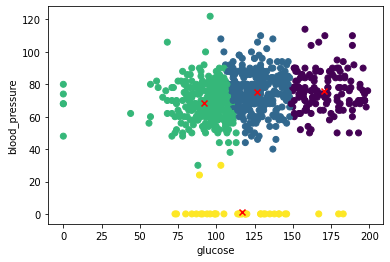

In [ ]:
X = df[["Glucose","BloodPressure"]].values

# Define the number of clusters
k = 4

# Run the clustering function
clusters, centroids = clustering(X, k)

# Print the cluster assignments
print(clusters)

# Print the final centroids
print(centroids)

import matplotlib.pyplot as plt

# Plot the data points and the centroids
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel("glucose")
plt.ylabel("blood_pressure")
plt.show()


